# Linear Regression with 1 Variable

In [4]:
import pandas as pd
import matplotlib as Mlt
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, model_selection

In [ ]:
df = pd.read_csv("housesfinal.csv")
df

In [ ]:
df2

In [ ]:
df1 = df.iloc[0:5,:]
df1

In [5]:
df2 = df.iloc[5:9,:]
df2

NameError: name 'df' is not defined

In [93]:
df4 = pd.concat([df1,df3])
df4

,PlotArea,Price
0,800,22000.000000
1,1000,25000.000000
2,1500,33000.000000
3,2000,39000.000000
4,3000,50000.000000
5,1200,27952.442159
6,1800,35579.691517
7,2200,40664.524422
8,3500,57190.231362


In [16]:
X_test = df2[["PlotArea"]]
X_test

,PlotArea
5,1200
6,1800
7,2200
8,3500


In [13]:
X = df1[["PlotArea"]]
y = df1[["Price"]]

In [14]:
reg = linear_model.LinearRegression()
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
reg.fit(X, y)

LinearRegression()

In [75]:
y_final = reg.predict(X_test)

y_final

array([[27952.44215938],
       [35579.69151671],
       [40664.52442159],
       [57190.23136247]])

In [63]:
df2

,PlotArea,Price
5,1200,NaN
6,1800,NaN
7,2200,NaN
8,3500,NaN


In [91]:
df3 = df2[['PlotArea']]
df3

,PlotArea
5,1200
6,1800
7,2200
8,3500


In [92]:
df3["Price"] = y_final
df3

,PlotArea,Price
5,1200,27952.442159
6,1800,35579.691517
7,2200,40664.524422
8,3500,57190.231362


In [79]:
dff = df1+df2
dff

,PlotArea,Price
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN


In [1]:
df2.fillna(y_final, inplace = True)
df2

NameError: name 'df2' is not defined

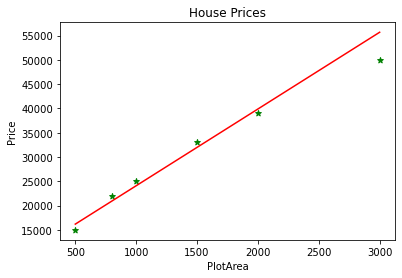

In [229]:
plt.scatter(X,y, marker = "*", color = "g")
plt.title("House Prices")
plt.xlabel("PlotArea")
plt.ylabel("Price")
plt.plot(X, y_predi, color = 'r')
plt.show()

In [200]:
z = pd.read_csv("preds.csv")
z

,Preds
0,1200
1,1800
2,2200
3,3500


In [201]:
y_pred = reg.predict(z)
y_pred

array([[26678.57142857],
       [34821.42857143],
       [40250.        ],
       [57892.85714286]])

In [207]:
reg.intercept_

array([10392.85714286])

In [205]:
z["Predicted Prices"] = y_pred
z.to_csv("Created_predprices")
z

,Preds,Predicted Prices
0,1200,26678.571429
1,1800,34821.428571
2,2200,40250.000000
3,3500,57892.857143


# Linear Regression with Multi Variables

In [95]:
ab = pd.read_csv("houses_multi.csv")
ab

,plotArea,bhk,age,price
0,1000,3.0,10,20000
1,800,4.0,12,21000
2,3000,5.0,5,50000
3,2400,2.0,7,22000
4,2800,NaN,11,24000


In [97]:
import math
c = math.floor(ab.bhk.median())
c

3

In [99]:
ab.bhk.fillna(c, inplace = True)
ab

,plotArea,bhk,age,price
0,1000,3.0,10,20000
1,800,4.0,12,21000
2,3000,5.0,5,50000
3,2400,2.0,7,22000
4,2800,3.0,11,24000


In [102]:
li = linear_model.LinearRegression()
li.fit(ab[['plotArea','bhk','age']], ab.price)

LinearRegression()

In [104]:
li.intercept_

12506.17066290549

In [111]:
li.predict([[4500, 9, 2]])

array([89542.40126939])

# Dummy Variable Reg

In [144]:
pq = pd.read_csv('houses_area.csv')
pq

,area,plotArea,price
0,Akota,1000,20000
1,Akota,800,18000
2,Akota,3000,50000
3,Vasna,1200,26000
4,Vasna,2800,53000
5,Bhayli,1700,25000
6,Bhayli,3500,51000
7,Bhayli,2100,40000
8,Vasna,700,21000


In [162]:
X1 = pq.iloc[0:3,1]
y1 = pq.iloc[0:3,2]
X2 = pq.iloc[5:8,1]
y2 = pq.iloc[5:8,2]

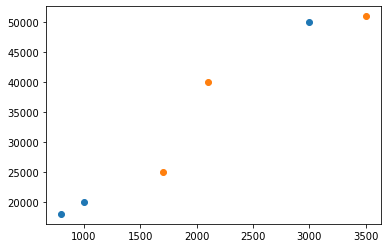

In [165]:

plt.scatter(X1, y1)

plt.scatter(X2, y2)
plt.show()

In [142]:
vw = pd.get_dummies(pq.area)
vw

,Akota,Bhayli,Vasna
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,0,0,1
5,0,1,0
6,0,1,0
7,0,1,0
8,0,0,1


In [127]:
rs = pd.concat([pq,vw], axis = 1)
rs

,area,plotArea,price,Akota,Bhayli,Vasna
0,Akota,1000,20000,1,0,0
1,Akota,800,18000,1,0,0
2,Akota,3000,50000,1,0,0
3,Vasna,1200,26000,0,0,1
4,Vasna,2800,53000,0,0,1
5,Bhayli,1700,25000,0,1,0
6,Bhayli,3500,51000,0,1,0
7,Bhayli,2100,40000,0,1,0
8,Vasna,700,21000,0,0,1


In [130]:
ff = rs.drop(['area', 'Vasna'], axis = 1)
ff

,plotArea,price,Akota,Bhayli
0,1000,20000,1,0
1,800,18000,1,0
2,3000,50000,1,0
3,1200,26000,0,0
4,2800,53000,0,0
5,1700,25000,0,1
6,3500,51000,0,1
7,2100,40000,0,1
8,700,21000,0,0


In [134]:
X = ff.drop(['price'], axis = 1)
X

,plotArea,Akota,Bhayli
0,1000,1,0
1,800,1,0
2,3000,1,0
3,1200,0,0
4,2800,0,0
5,1700,0,1
6,3500,0,1
7,2100,0,1
8,700,0,0


In [136]:
y = ff.price
y

0    20000
1    18000
2    50000
3    26000
4    53000
5    25000
6    51000
7    40000
8    21000
Name: price, dtype: int64

In [137]:
model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression()

In [139]:
model.predict([[3500,0,0]])

array([61432.43243243])

In [140]:
model.score(X,y)

0.961965089584729